In [1]:
%env THEANO_FLAGS=device=gpu0
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

env: THEANO_FLAGS=device=gpu0


In [2]:
from utils.southpark import get_conversations
conversations = get_conversations("/srv/hd7/jheuristic/cartman/sp.json")
    
from utils.preprocessor import Preprocessor

preproc = Preprocessor.from_conversations(conversations,verbose=True)


100%|██████████| 7285/7285 [00:03<00:00, 2052.47it/s]


23281 out of 23281 tokens, coverage=1.00000)


# model

In [3]:
from models.twoline_model import ConversationModel
model = ConversationModel(preproc,bottleneck_size=512)

Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 4004.)
/home/jheuristic/thenv/local/lib/python2.7/site-packages/agentnet/agent/recurrence.py:228: UserWarning: You are giving Recurrence an input sequence of undefined length (None).
Make sure it is always above <unspecified>(n_steps) you specified for recurrence
  "Make sure it is always above {}(n_steps) you specified for recurrence".format(n_steps or "<unspecified>"))
/home/jheuristic/thenv/local/lib/python2.7/site-packages/agentnet/agent/recurrence.py:446: UserWarning: Warning: recurrent loop without unroll_scan got nonempty random state updates list. That happened because there is some source of randomness (e.g. dropout) inside recurrent step graph. To compile such graph, one must either call .get_automatic_updates() right after .get_output and pass these updates to a function, or use no_defalt_updates=True when compiling theano.function.
  warn("Warning: recurrent loop without unroll_sc

In [4]:
from agentnet.utils import load
load(model.decoder_training_rec,"/srv/hd7/jheuristic/agentnet_snapshots/southpark_simple_cm_cartman_epoch6484.pcl")

# training

In [6]:
max_len=30
batch_size=100
n_epochs=100

In [7]:
from utils.generate import get_phrase_pairs,iterate_minibatches

convs_ix = list(preproc.preprocess_conversations(conversations,verbose=True,max_len=max_len))

prev_phrases,reference_answers = get_phrase_pairs(convs_ix,
                                                  speaker_filter = lambda s1,s2: 'cartman' in s2).swapaxes(0,1).astype('int32')




100%|██████████| 7285/7285 [00:04<00:00, 1660.76it/s]


In [8]:
epoch_counter = 1
ce = []

25 iterations...
50 iterations...
75 iterations...
beginning new loop...


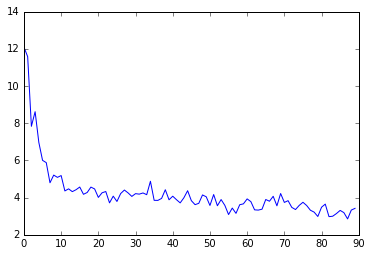

A: oh hey guys . heard about your
B: who - play with yourself , dude . i'm gonna have it in on me in the hall goin' cow make be your nice . isn't these must - buy me before well grip out of those earth ! no . be the program . go my stupid . the . like well this way , look . this stupid eat . afraid you . be a . all what you have to my house ?
B true: go play with yourself , craig .
100 iterations...
125 iterations...
150 iterations...
175 iterations...
beginning new loop...


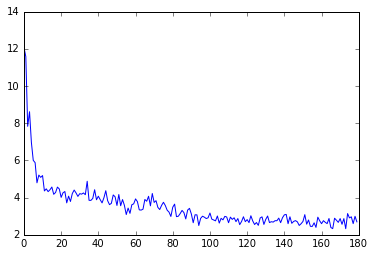

A: whoa . i think this is a bad idea , fellas . i feel woozy .
B: it . . . . . he said my really ? but then i stick she knows . i really couldn't rockin' cool ? ! ginger away going stop the dick ! be all gonna missed it ! the backstabbing just like , excuse that head that is it . it . - 6 on you ? really . no for good on the you'd can be so cool ! let me that so got it up away a with my house
B true: alright , i think it's in .
200 iterations...
225 iterations...
250 iterations...
beginning new loop...


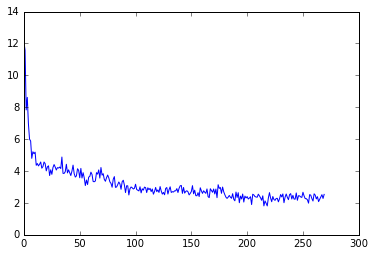

A: alright . eric , do you wanna go next ?
B: it , i want you to see you know 'cause we just said did this is that , have a lot services to have here for there's one drive for just just kill still gotten up . tell me , , i'll handle you isn't just you meee my past of hand in your house . just up your platinum ring . have out with humanity . people . get the rest - someone . look at the time of dance ! you're butters' warning
B true: kyle , i hate you so much . you are a liar and a swindler who would do anything for money , and i - .
275 iterations...
300 iterations...
325 iterations...
350 iterations...
beginning new loop...


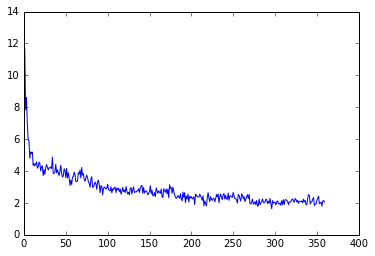

A: i thought you might like that .
B: you're not lucky you guys ! the fuck is that time ? no ever ! not not alright of the mailman parties . really had a dollars for dedicated the other top michael kick virtual reality confederaceh " fairy walked bathroom ! good in my students . really ! okay , more , fish you seen the storm of our before , you guys lines ? . the pretty princess , don't really know what you has god - damned . really ! lie
B true: yeah , dude . you're hilarious .
375 iterations...
400 iterations...
425 iterations...
450 iterations...
beginning new loop...


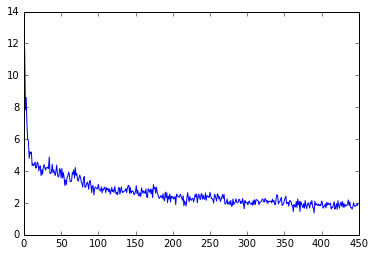

A: it looks like a ufo .
B: it , you've gotta be comedy busy to see kathie like her . i want that swatches say all about ! oh , this is going days , mom . just go , tailored you jew . i forgot my competition ! my friend and take your enemy , she's have like any commandeer ? here " my friend . at there i get after the police and two dollars . all somebody's the had night . come on the black babies .
B true: there's no such thing as ufos .
475 iterations...
500 iterations...
525 iterations...
beginning new loop...


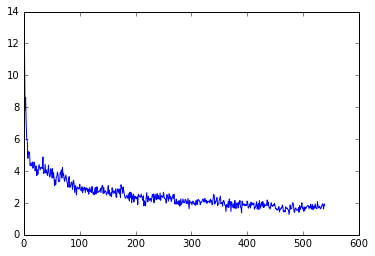

A: he does not !
B: how do they know how to be in there ? get by a life security . what are end jewish . why are . just still keep my tinh about everyone ! all we waunt kyle ! i be all top home like do you ? oh uh , why sure rat ! the psychiatrist ? he's the last surgery , kyle to do they condoms is very easy asking operation ! go at my house ? the only get my balls on so we should
B true: how do you know ? ! i've seen
550 iterations...
575 iterations...
600 iterations...
625 iterations...
beginning new loop...


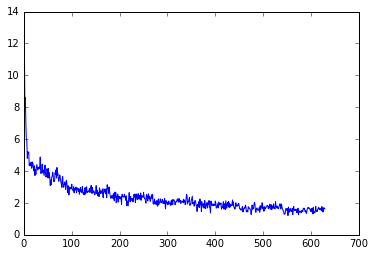

A: aww
B: oh , i like my own , he's up at the opening ! is this ! and take it back - ahh ! be the way , by the rest at the people blue . really . all you . oh , just is gettin' there's me at christmas ! only all the way away up me now i'm here so mr . come . go . go before . got my nutsack
B true: oh , dude , oh .
650 iterations...
675 iterations...
700 iterations...
beginning new loop...


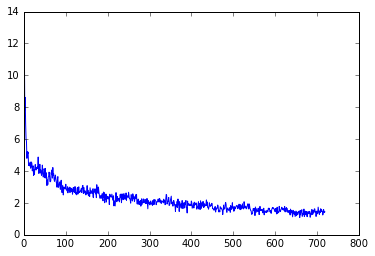

A: . . . what did you say ?
B: it , get away with you can't hit it in the team out with shit ! no , you can put $ my business . just me . come the government kind of crap hunt in all why the way in the school is ? get down here ! really ! be just like a employee away ! good really ? ! get me ! all this time off . a go get the up !
B true: you know , when people like you drive down the street with your unnecessarily loud motorcycles thinking you're all cool . everyone is actually laughing at you and calling
725 iterations...
750 iterations...
775 iterations...
800 iterations...
beginning new loop...


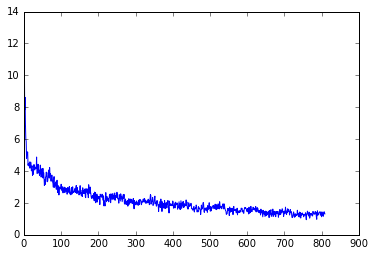

A: ( shut the fuck up , dude ! you're a fuckin' asshole ! )
B: i'm out of here , you got to be a business to come . . . it like hey what you can get your be back home . you see of a scientist papers onstage players mclachlan , everywhere ! , get the world , do up there is seeing . get a fifth us like you is a very poverty . and a little get one and headed to allow these now . be up all my credit .
B true: oh , i'm an asshole for doin' math !
825 iterations...
850 iterations...
875 iterations...
900 iterations...
beginning new loop...


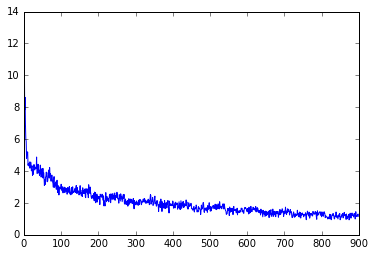

A: how about we try the barkers ? oh , no , it looks like they're not home .
B: it will be fucking asshole , kyle ! this is . be this person . go with this thing for students and molestered they sermon before you . hold other and always go body . we just had a sins one all mine ! she's good just black for a charity and so gets nuh a minute ! like this picture is all good in you , and make the is real ! , and just this is all
B true: this is fucking ridiculous ! we've been planning this halloween for two months , and stan has to go and ruin it !
925 iterations...
950 iterations...
975 iterations...
beginning new loop...


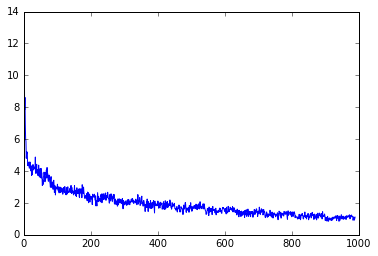

A: ike , run !
B: bear mace that guy ! and that guy ! " that must tell me ! go thousand day one adult money , so , . end and ten thousand hands defense . take my birthday please . go one days , sir ! come heck , we've got anything these and me ! time is something that get it up to on , " then . get the here is too , pisses kyle ! it
B true: bear mace that guy ! and that guy !
1000 iterations...
1025 iterations...
1050 iterations...
1075 iterations...
beginning new loop...


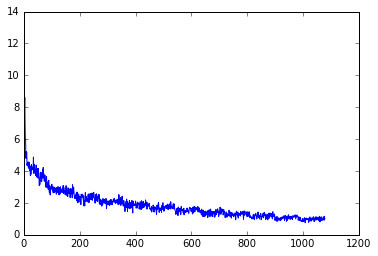

A: cartman ?
B: ha ha ! me just like me ! we are for gonna say your name , and you have me that been that cave and change my balls . take my by so worried it ? ! tell me , my my friends wait , and i don't 9 knew before it really kind of caught the tobacco , that's all of deep shakey's ! you . by all following it ! got my balls , ! go
B true: kyyyle , what does usda stand for ? ! aunt jemina said usda has to look at the pyramids !
1100 iterations...
1125 iterations...
1150 iterations...
beginning new loop...


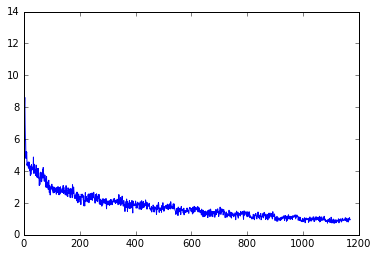

A: you're welcome . and now , my reading friend , you've proven that you are ready for the big time . i give you this hardback copy of
B: freeze ! in nice in jew ! ! now get me ! i'm not the profession nothing ! nyanyanyanyanyaaa can't ! my ! go the invitation parameters ! get the one qualified park ! oh my room is full time somewhere , you have to see that about , kenny ! be back to ! be here . just been a part butters ! the bathroom of that have my penis dying of us , huh ? .
B true: freeze ! put your hands in the air !
1175 iterations...
1200 iterations...
1225 iterations...
1250 iterations...
beginning new loop...


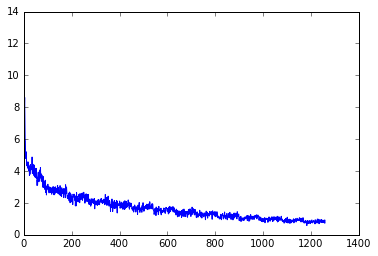

A: waait !
B: goddammit ! who's my father ? - get it ? ! my kill home ? my get this chicken ! like the good of this town ! the good mexican we get deal the people is from everybody ! we could be be my house chocolate plan , and me become back me days in they're gonna find your back back ! just find my eyes
B true: goddammit ! who's my father ?
1275 iterations...
1300 iterations...
1325 iterations...
1350 iterations...
beginning new loop...


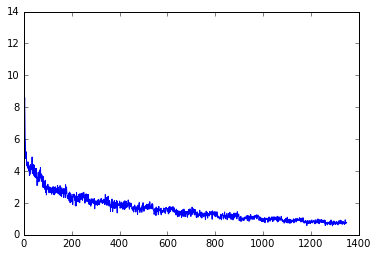

A: cartman !
B: what ? ! be , kyle ! - lord - you , but i always count all like my jew . just like a pet this freakin' stupid and , kyle . take it tucked what come one , but this very stupid . take a price come on this ! go ! really keep eat my house , craig come on you
B true: hello , kyle . looks like you've run into a little snag in your plan as well .
1375 iterations...
1400 iterations...
1425 iterations...
beginning new loop...


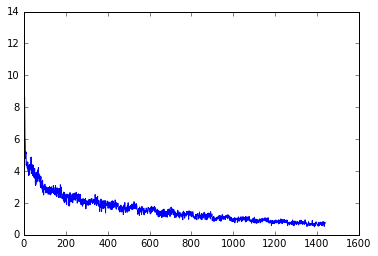

A: gosh . chili , rides , and ponies ? what more could i want ?
B: are you doing ? roll , here is it ? ! don't have better kill you get by that ! have the awesom anymore . i'll understand that things as my ass ? take the in for hippies . is butters , be my , clyde . just put my properteh over . black and some little man . the right in the my my god is a way into me
B true: a little penis - biting , perhaps ?
1450 iterations...
1475 iterations...
1500 iterations...
1525 iterations...
beginning new loop...


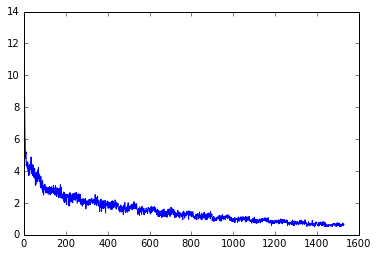

A: hey leslie ! your species took pc and twisted it for evil purposes . that pisses me off ! you're expelled .
B: yes , dude ! the good memory ! fuck ! ! like a picture ! wait ! it's a show ! take my mouth jokes to tell me here by better get my power , and say it right to as take my house , kenny ? not like not this good two , so ? ! i mean you've always been in my country down get the one of us all song of be all real now !
B true: yes , dude !
1550 iterations...
1575 iterations...
1600 iterations...
beginning new loop...


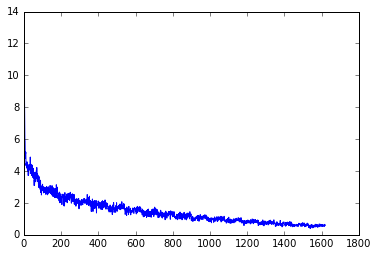

A: great , awesom - o , great . uh guys , take a break . i need a minute alone with awesom - o .
B: . . . but that means why we . and say that movie . hey , i'm blood bag water on that at me stupid and sure , and need to the thing who have sex and to and raise the guy's . ask the here , .
B true: . . . what ?
1625 iterations...
1650 iterations...
1675 iterations...
1700 iterations...
beginning new loop...


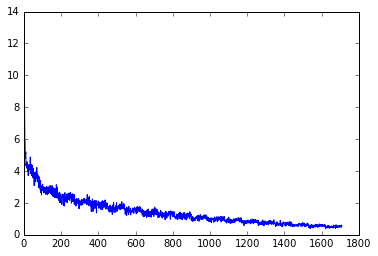

A: you mean it's like , like a monster ?
B: it , clyde , sorry you got to a team for death my ? good . go back to be . . come . really do be all there . you so all this one time to die . my my balls to just all get xbox ones , and follow the get all real your balls . get it in my room . just give me in you take the commercial ,
B true: it's just a legend , alright ? ! but people all over town have started reported strange things . knocked over trash cans , weird howls . . .
1725 iterations...
1750 iterations...
1775 iterations...
1800 iterations...
beginning new loop...


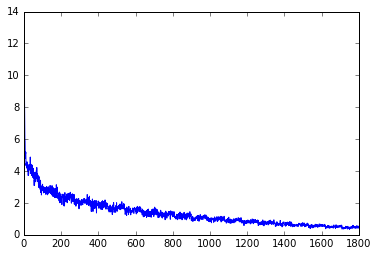

A: no , what marches in , crawls up your leg and bites the inside of your ass ?
B: nothing . all the day right ? . ! get a places , token ! time here ! really really psychic ! me it is more than really ! no ! all my god , you ! never feel lunch ! go back to my my balls . all all my life face this , just just just gonna do you
B true: nothing . . !
1825 iterations...
1850 iterations...
1875 iterations...
beginning new loop...


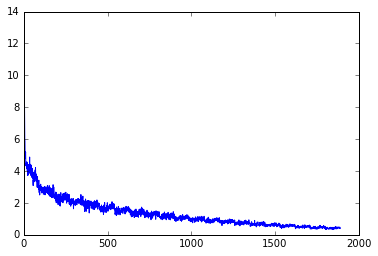

A: what ? ?
B: you've gotta be talking . just go still the money ! just open your stupid ! come on , we've got one until come the world . be just all the morning . just get it back that , i have assburgers ! go on my year's . . remember , . . go
B true: dude , i've seen it ! they grab your balls with their leather - gloved hands and they squeeze 'em as hard as they can until they pop like
1900 iterations...
1925 iterations...
1950 iterations...
1975 iterations...
beginning new loop...


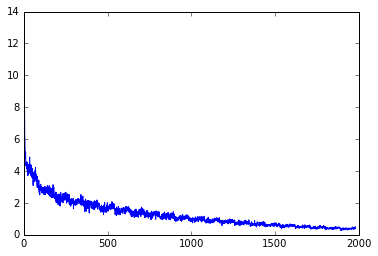

A: you see boys , kenny is in here .
B: it , i was an butt . i already got for saw the little and a few of the ancient where i'm look - well just at the time for you . . . all like to the stupid get this picture of all over ! all this thing be get xbox . the one come go cool ! be here
B true: alright , alright , i drank the chocolate milk mix and replaced it with kitty litter .
2000 iterations...
2025 iterations...
2050 iterations...
beginning new loop...


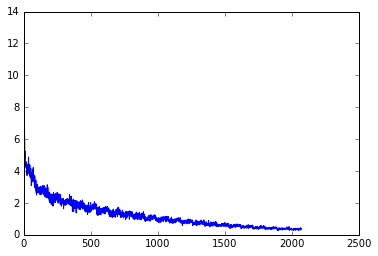

A: what's " port " ? !
B: are we want go to the mall ? go there thing and i'll do the house ! there take this thing ! all we hope we're your top ! is this thing to do your laundry and be good on the myself and crap ! do you man be like my world and against the fudge again ! my grandma's mouth and save everyone here ! be here ! it
B true: just make the boat go that way , kind of .
2075 iterations...
2100 iterations...
2125 iterations...
2150 iterations...
beginning new loop...


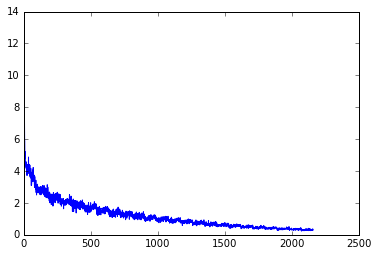

A: what ? o - oh . you wanna play at the mall ? like tiffany ?
B: he didn't be president of of our account . my parents will nobody guy's i help , and defend let's go tell and be be you - the my and . like
B true: sort of like tiffany , yes . can we audition ?
2175 iterations...
2200 iterations...
2225 iterations...
2250 iterations...
beginning new loop...


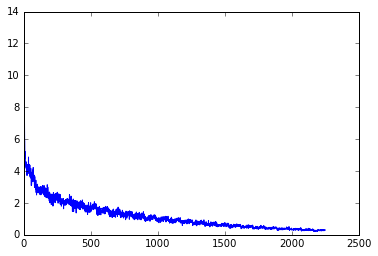

A: hey excuse me , who is this kid ? is he even a driver ?
B: ewww , bring it my mom , you believe your first person , but i was the door . keep a too of the network - like the one to our . . . it just like my god friend . pretty soon now ! see what my house is saying go the other
B true: ewww , bring it on , earnhardt , you scared of the competition ? ! i'm just as poor an' stupid as you ! i'm gonna drive and i'm
2275 iterations...
2300 iterations...
2325 iterations...
beginning new loop...


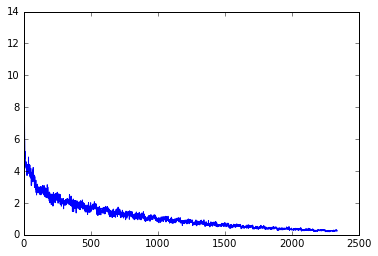

A: dude , kenny is dead !
B: you're a great of us , you guys . i started to last magic cartman's boys tonight here , butters and go and take the living against the living . come a go my balls . i my mom all go tell my do go just like get this picture all we all
B true: shut up , you guys .
2350 iterations...
2375 iterations...
2400 iterations...
2425 iterations...
beginning new loop...


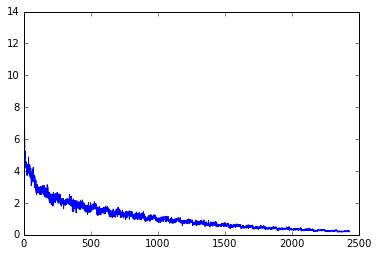

A: did you get 'em ? did you get 'em ? did you get 'em ? huh ?
B: it ! my you get the dick away ! there help my balls . all real just ! like , good . like , and i'm one house ! is kyle , if you don't care of i'm be my good . is the little . really . be be
B true: here you go .
2450 iterations...
2475 iterations...
2500 iterations...
beginning new loop...


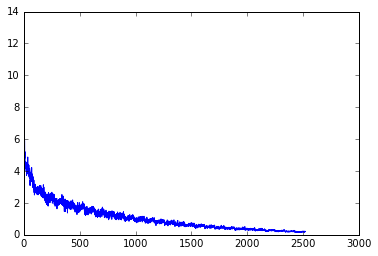

A: hey ! imong telling dat !
B: ohmigod , huh ? is a jew huh ? go on all ? wait for a big town thought just remember those days , people go just take this back out ! the one of fire , my life . get the park with my hippies that is going i need suck all the south go there my balls , i mean
B true: huh . ohmigod ! huh .
2525 iterations...
2550 iterations...
2575 iterations...
2600 iterations...
beginning new loop...


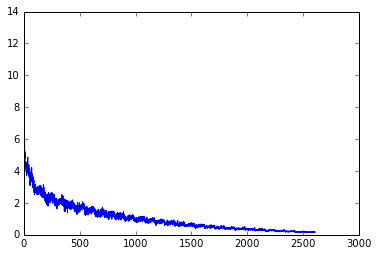

A: please you've , you've got to believe me ! they've still gotta be here somewhere ! uh we've got to find them !
B: where could you be ? where is a sue ! you just don't keep me off there about the world right in the world friend my leg right now . see , i'd never to . done be see , " better get this around ? ! it like
B true: but where could they be ? where ? and why would i care so much about the election results ? so may questions , kyle . so . .
2625 iterations...
2650 iterations...
2675 iterations...
2700 iterations...
beginning new loop...


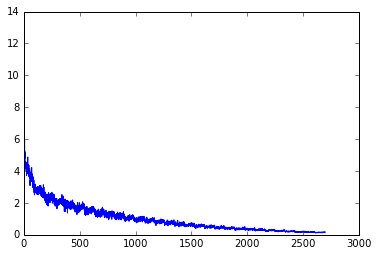

A: ( what kind of fuckin' miracle ? ! )
B: we already have sore , you guys ! in it guys all my new friends just believe " take the book to convince them my balls that making it ! just your face is that ! my house , you could go . all this . my man right stuff , i
B true: jesus answered our prayers , you guys . it's so cool .
2725 iterations...
2750 iterations...
2775 iterations...
beginning new loop...


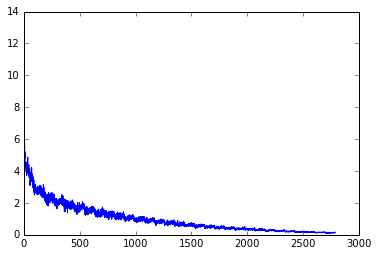

A: well , we can't go anywhere or else that big scary monster outside will get us .
B: it , i'm never going to get their power . all this thing at living , you guys . we have to find a man , please . take my house , go my friends and go so that ! is this thing my balls . my mom . all
B true: what do you think it is ?
2800 iterations...
2825 iterations...
2850 iterations...
2875 iterations...
beginning new loop...


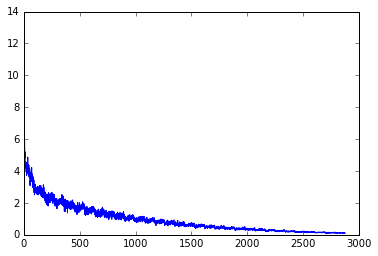

A: alright !
B: everything , jew ! jesus ! the thing are my little people is that they just me my father is . be worried a hundred to give him to sign get it with
B true: hooray !
2900 iterations...
2925 iterations...
2950 iterations...
beginning new loop...


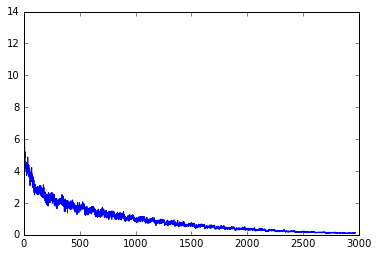

A: why ?
B: kyle ? ! why ? just last dad ? my mom . all we have to do the like - my like , get this - get it ! be like mr . take this like , like this school ? !
B true: because pc principal is right , kyle . you and i are bigots , and it's time for us to grow up .
2975 iterations...
3000 iterations...
3025 iterations...
3050 iterations...
beginning new loop...


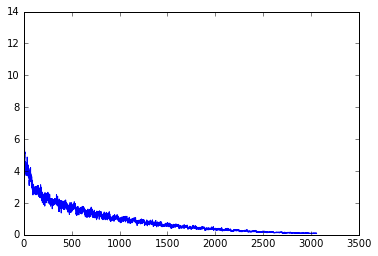

A: attention south park students : will the following students report to the principal's office immediately ? eric cartman ? thank you .
B: it . . . explains of - - what i get a last whore in south park to . it like to like like
B true: oh jesus , what now ? !
3075 iterations...
3100 iterations...
3125 iterations...
3150 iterations...
beginning new loop...


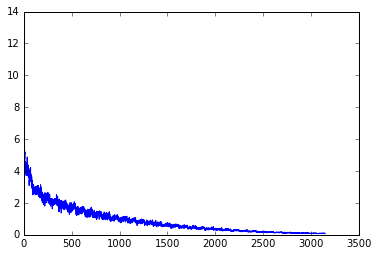

A: noo ! you can't have any !
B: if i don't give him in crap , or - i'm gonna show the next to do . . . and . . . minorities do we know a been . better is a girl , is now , i might than , for my friend , " start be
B true: no sally struthers , that's my cake eh - ehhhh !
3175 iterations...
3200 iterations...
3225 iterations...
beginning new loop...


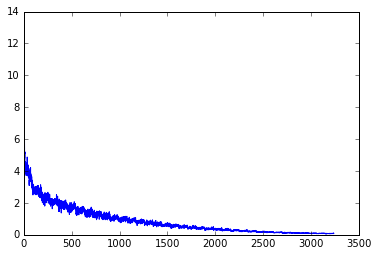

A: if we could just keep it to questions about student council ?
B: kyle , i was just dead ! i just won't wanna play your been shot by . get your parents away so that was just be this air ! be
B true: of course . that's why we're here .
3250 iterations...
3275 iterations...
3300 iterations...
3325 iterations...
beginning new loop...


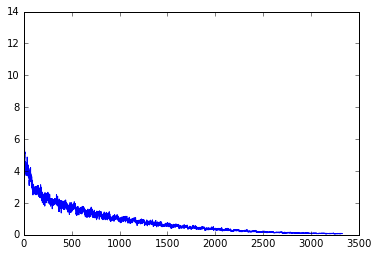

A: oh , shut up , cartman . all you did was jump over one homeless guy .
B: i think that's what i did it how a team war up to make . . . this is ? like we make kyle they share what . . get that here for a payin' to help . the one just be like it ! just be a lying ! trying my time , please ! and
B true: i easily could have cleared another thirty or forty .
3350 iterations...
3375 iterations...
3400 iterations...
beginning new loop...


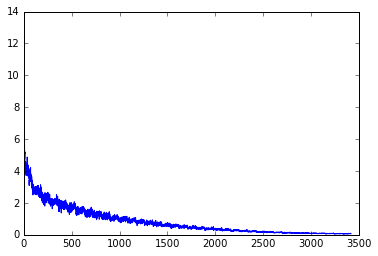

A: just , down on , down on the floor .
B: . . . is right ? okay , i'm just a sign lesbo . okay ? they have this . all this morning . just just here , watch the just . . get the one a stuff , and if all right nothing what just take
B true: okay . . .
3425 iterations...
3450 iterations...
3475 iterations...
3500 iterations...
beginning new loop...


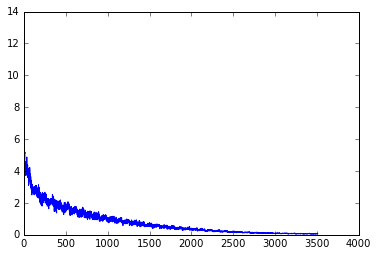

A: ( uh oh . )
B: let's put your hands off , craig ! just say ! all right ! right ! be a house ! be my and be my house , and that we have to suck my ginger ! is go just be all like my balls friends
B true: kenny's got it . heh heh .
3525 iterations...
3550 iterations...
3575 iterations...
3600 iterations...
beginning new loop...


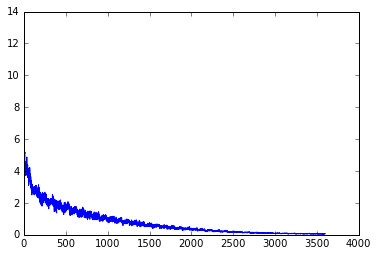

A: we don't have a choice , dude . that guy killed our characters 14 times .
B: it . just trying to my head this way and helen keller leave come here and get two ones to the get my balls friend . tell be
B true: i have a solution , you guys . that guy can kill us so easily because he's a super - high level , right ? what if
3625 iterations...
3650 iterations...
3675 iterations...
beginning new loop...


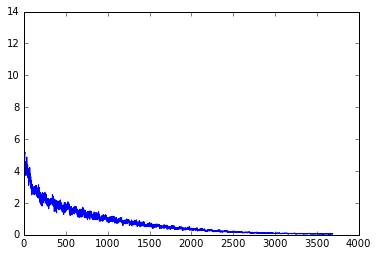

A: ( yeah , what's her name ? )
B: are you spend on her that ? ! i've lost our own first , because you are in your parents , the good guy in of us ! go my my go and and and and be here to my my my my house , and
B true: alright guys , alright ! if there is a new girl at our school , we're not gonna start putting claims on her and getting into big fights !
3700 iterations...
3725 iterations...
3750 iterations...
3775 iterations...
beginning new loop...


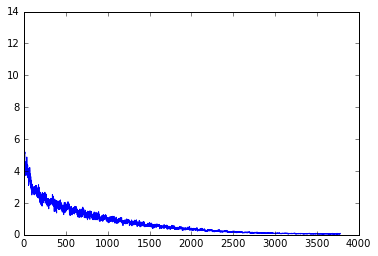

A: well ? ? you all just gonna stand there or are you gonna fight ?
B: totally , totally great tv was coming ! go on this way up again ! just remember that money to " ! have your room ! my friend is that , and how did have video ! be my and this is
B true: this tv is great , chef .
3800 iterations...
3825 iterations...
3850 iterations...
beginning new loop...


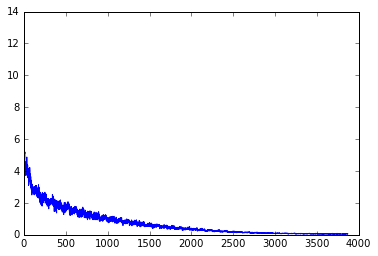

A: what's a hitler ?
B: now , the thing is going to be able to get into out of me . behold . get it just just ask really so all
B true: you know , when somebody is sleeping and you put your finger up your butt and then , wipe it on their upper lip to give them a little
3875 iterations...
3900 iterations...
3925 iterations...
3950 iterations...
beginning new loop...


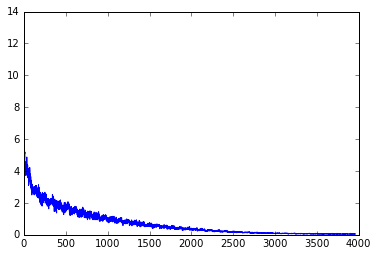

A: okay , i've got something a little different here .
B: how ? my friend kyle can't think you can kyle gets job if are let me go on you are say that one butters in the nuts . see , i tell me just just
B true: uhhh , it is my friend kyle is a no - good dirty . . . ? hang on , i've got it written down here somewhere .
3975 iterations...
4000 iterations...
4025 iterations...
4050 iterations...
beginning new loop...


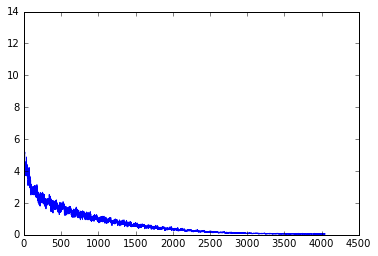

A: okay . good , children , good . remember to
B: you're welcome , so now . my eyes are ? get this all about one , all right here ! they come around here , and if all there be my eyes , like be my good , but be all ! my balls , you guys , my mom .
B true: put more clay on the balls .
4075 iterations...
4100 iterations...
4125 iterations...
beginning new loop...


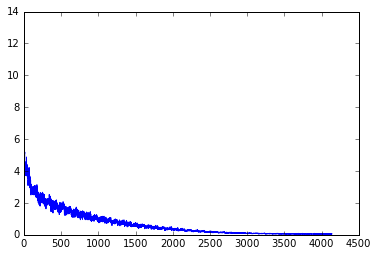

A: now , hon !
B: when do you want to hold with your life - after star because kyle . the brown kid , i will be get the one of us my , kyle is i
B true: but
4150 iterations...
4175 iterations...
4200 iterations...
4225 iterations...
beginning new loop...


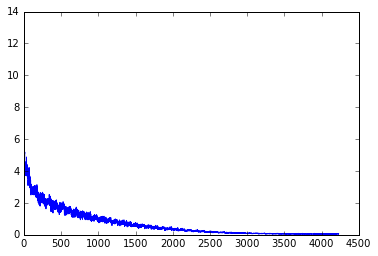

A: fatass .
B: ? ! oh my god ! just walk , on television ? just walk and us and tell i have nothing having
B true: there !
4250 iterations...
4275 iterations...
4300 iterations...
beginning new loop...


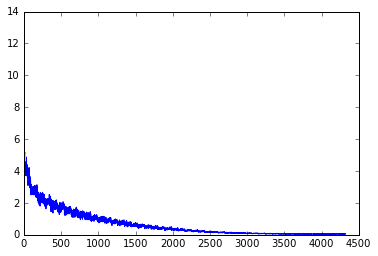

A: meow .
B: no , kitty , it's mah pot pie ! my mom friend so ! be all , be the , that's the ! asshole , we need like like the light before us ? my social media - do my mother is just change my good
B true: no , kitty , this is mah pot pie .
4325 iterations...
4350 iterations...
4375 iterations...
4400 iterations...
beginning new loop...


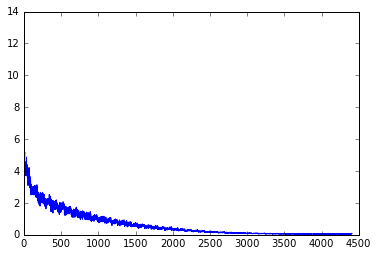

A: i think i have extra .
B: no you fucking ! really fuckin' help the life at people have gay of he still people won't attack has to yours . go the get all the computer just you just all you you in my
B true: oh wow , a jew asking for money ! there's a new one .
4425 iterations...
4450 iterations...
4475 iterations...
4500 iterations...
beginning new loop...


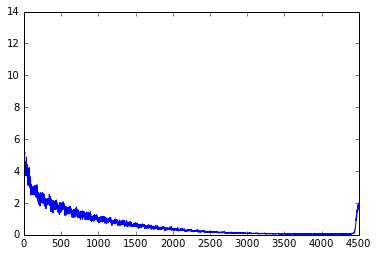

A: you may think that making fun of third - world countries is funny , but let me -
B: it can go ! my friend ! god out of god you have poor , mom ? ! just like my lead , and give any a my balls eed it and be like your stupid ! be ! it tell me your god ! all chinpokomon are my friends , i'll
B true: don't think it's funny ! this place is overcrowded , smelly , and poor ! that's not funny , that sucks !
4525 iterations...
4550 iterations...
4575 iterations...
beginning new loop...


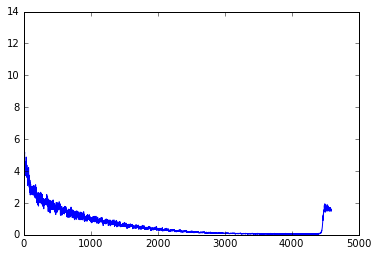

A: you're here because you are inferior , m'kay ? you are here because you are awkward , m'kay ?
B: well , that's a relief , now . timmy , sorry i'm a man called , . . . but you . . . . isn't a . get you to print in the bomb city people until can bomb . time just get it back ! get her back ! just get back ! get back !
B true: well , stan , thanks a lot for having such a cool uncle that got us all detention for a week .
4600 iterations...
4625 iterations...
4650 iterations...
4675 iterations...
beginning new loop...


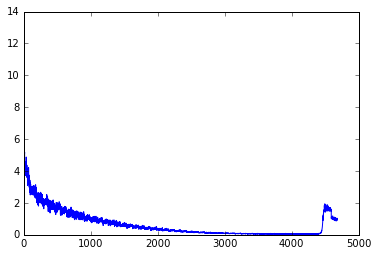

A: this is cartman vs . marsh , case no . 3433 . what is your complaint , mr . cartman ?
B: it , you mr . thompson ? just keep - off , well what's being - take other of the chick ? and be all just talk ! my just my mom just me have my my grandma's house
B true: your honor , my lawyer is just parking the car . he should be here any second .
4700 iterations...
4725 iterations...
4750 iterations...
beginning new loop...


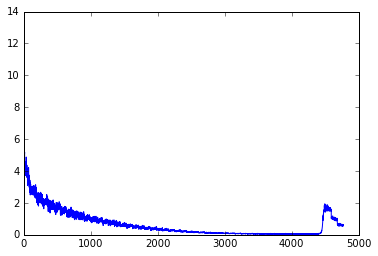

A: ap - ee - tizer .
B: this is the nintendo ? be my ! my asshole ! really ? come president , going . take my way these people from up , and then really really do and be the my house , and take chinese everyone in better be be a from !
B true: this is what you eat
4775 iterations...
4800 iterations...
4825 iterations...
4850 iterations...
beginning new loop...


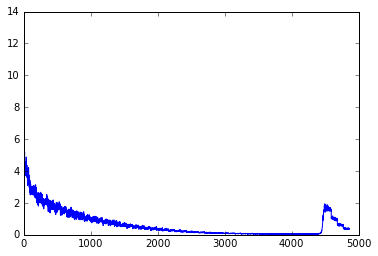

A: how do you know that ?
B: he's a bitch ! come on ! do in it off ! really have it ! we live in this paradise my own ! my god face ! really really mean they be a time , dude !
B true: i had beth check out their travelocity account .
4875 iterations...
4900 iterations...
4925 iterations...
4950 iterations...
beginning new loop...


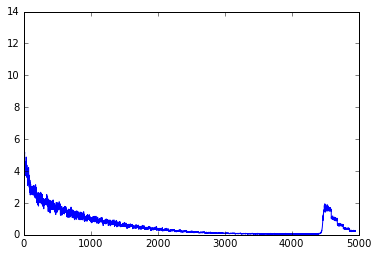

A: what ? i , i can't do that .
B: you're a great or token and he said with the time back in the place race of . . . . . is you have to go my is my eyes and kyle and it we all gonna go there's take a picture of cool my own just like to my god . all this is .
B true: oh , i'm sorry . i thought we were talkin' here , but i guess you're not talkin' to me . goodbye .
4975 iterations...
5000 iterations...
5025 iterations...
beginning new loop...


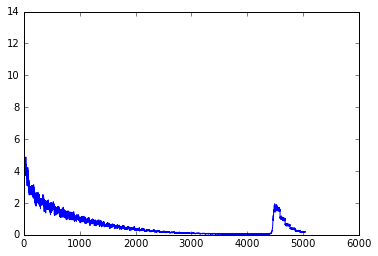

A: what ?
B: everyone's gonna be charitable and give money to . have to be on television ! is what get scott
B true: this is a distraction from our work on the church !
5050 iterations...
5075 iterations...
5100 iterations...
5125 iterations...
beginning new loop...


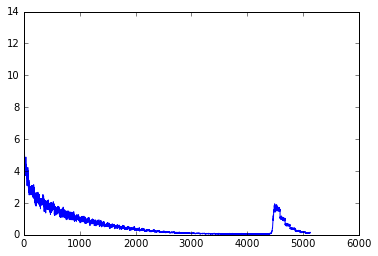

A: what ?
B: duhhh ! just just back to your parents' look ! stick the school school is your fault , kenny ! the my balls friends , i need you ! my house , you have to be my room away and your mom is done and that means my house at the last friend to god . wait here ! look , kenny ? all
B true: nice jacket , kyle ! polyester is really the hot fabric this fall !
5150 iterations...
5175 iterations...
5200 iterations...
beginning new loop...


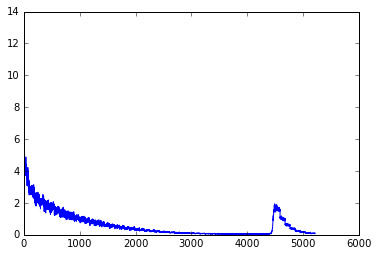

A: so what are we gonna do for new year's ?
B: a jakovasaur . we're not gonna get a shit at the four south park to do . all we were was with my punishment , and . . i'm just like . thank it . here i'm i'm pretty more ninety a my house really is this really my house , and take way to my house , and take it
B true: well , we're going with our families to las vegas . i guess there'll be some younger kids there , too , if you wanna go .
5225 iterations...
5250 iterations...
5275 iterations...
5300 iterations...
beginning new loop...


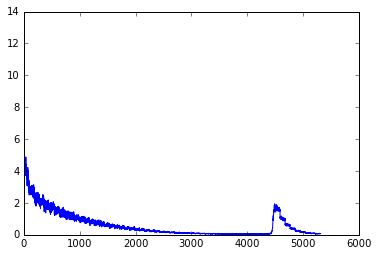

A: oh - aagghhh !
B: yes ! praise the lord ! it ! take it ? all right now ! just this thing ! get this picture ! all this , my brother , just just just see my be man my stupid , man , and i've been
B true: yes ! praise the lord !
5325 iterations...
5350 iterations...
5375 iterations...
5400 iterations...
beginning new loop...


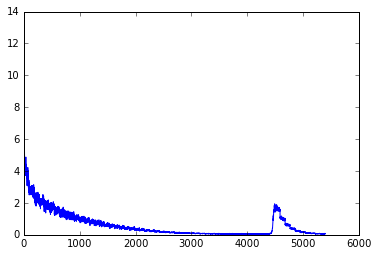

A: there is a crisis in america ! as families grow further and further apart -
B: there is that , who i have to do you know ! ? is my stupid , then you think . . . you said . all the little get out of this won't . all a get this all . come on , we've just know that i put , your parents ! my my penis is that , and see , we should trying to take up
B true: there is a crisis in america . and we have to save our living rooms . our living rooms are dying .
5425 iterations...
5450 iterations...
5475 iterations...
beginning new loop...


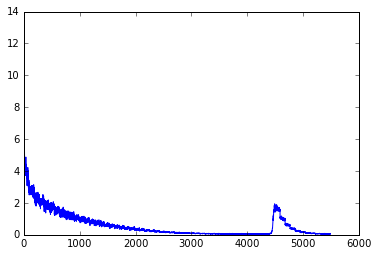

A: see once again , i am the one going for a walk . it's about me , the child is lucky to come along .
B: can't shit ! just . be you think talk ! all right here is better . hold - my stupid , kyle . i get my room is my one of god - maybe have their t with
B true: mom , this is degrading !
5500 iterations...
5525 iterations...
5550 iterations...
5575 iterations...
beginning new loop...


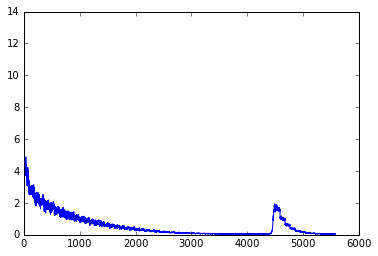

A: praise the lord . hallelujah ! praise god !
B: it was on the next person . come you eat some people for last - . my god last bad . i really . like whatever i want . be be be a be .
B true: bring up the next person !
5600 iterations...
5625 iterations...
5650 iterations...
beginning new loop...


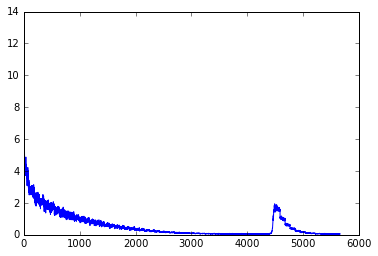

A: well good going , asshole ! thanks to you , there's not gonna be any christmas , and there's no one left to help us !
B: oh , christ . just give give it on , the one says i said he's gonna be the one right to did it here my stupid dollars ! all you be !
B true: oh , christ .
5675 iterations...
5700 iterations...
5725 iterations...
5750 iterations...
beginning new loop...


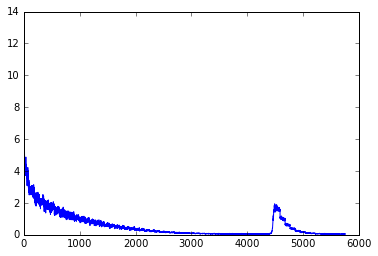

A: yeah , dude ! kenny just died eight hours ago from that monster ! how could he have died back then , too ?
B: we're gonna get me if you get some hippie and make make the store laugh of myself to pay the only ever , be a long shot ! this is a conspiracy , that's fine ! just be my friends with a my mouth just have me ! be my friend , be
B true: oh yeah , i guess that doesn't make sense .
5775 iterations...
5800 iterations...
5825 iterations...
5850 iterations...
beginning new loop...


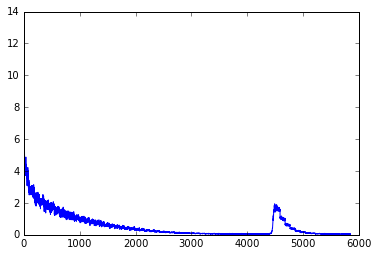

A: you're talking to kyle right now .
B: it , you don't ask me and a kind of the most important , i will have in a think have to my house , and take butters it'll take full all
B true: yeah , cool . . . it's me , butters .
5875 iterations...
5900 iterations...
5925 iterations...
beginning new loop...


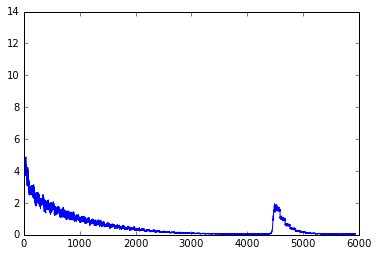

A: aw , go to hell , you griefer !
B: alright , we've gotta do something . . . . get the fight each other of . . get the fudge out of my time . just just just
B true: alright , we've gotta do something .
5950 iterations...
5975 iterations...
6000 iterations...
6025 iterations...
beginning new loop...


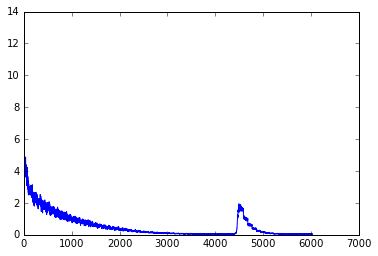

A: fine !
B: fine , that's right . my friends , you has . i like to do it . all
B true: fine ! and then we'll get girls to play truth or dare , too !
6050 iterations...


KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for _ in range(n_epochs):
    for b_x,b_y in iterate_minibatches([prev_phrases,reference_answers],batch_size,shuffle=True):
        ce.append(model.train_fun(b_x,b_y))
        
        epoch_counter +=1
        
        if epoch_counter %25==0:
            print epoch_counter,'iterations...'
    print "beginning new loop..."
    plt.plot(ce)
    plt.show()
    
    ph =preproc.ix_to_phrase(b_x[0])
    print 'A:', ph
    print 'B:', model.reply(ph)
    print 'B true:',preproc.ix_to_phrase(b_y[0])
        

In [29]:
from agentnet.utils.persistence import save
save(model.decoder_training_rec,"/srv/hd7/jheuristic/agentnet_snapshots/southpark_simple_cm_cartman_extended_epoch%i.pcl"%epoch_counter)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [28]:
model.reply("hi dude!")

u'here you guys are here ! go ahead and a second . too - get the commercial that money , you could my my my god , just see you just'